In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
class LinearRegression() :

    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None
    
    def _prepare_features(self, X):
        X = np.array(X, dtype=float)
        
        if X.ndim == 1:
            X = X.reshape(-1, 1)
            
        return X

    def fit(self, X, y) :
        X = self._prepare_features(X)
        y = np.array(y, dtype=float).squeeze()
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 1

        for i in range(self.iterations) :
            self.update_weights(X, y, n_samples)

    def update_weights(self, X, y, n_samples) :
            y_pred = self.predict(X)
            error = y_pred - y
            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1/n_samples) * np.sum(error)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X) :
        return np.dot(X, self.weights) + self.bias
    
    def get_params(self):
        return {
            'weights': self.weights,
            'bias': self.bias,
        }

True function: y = 4 + 3*x + noise
Learned: y = 4.0973 + 2.8941*x
weights: [2.8941183], bias: 4.09728514998442


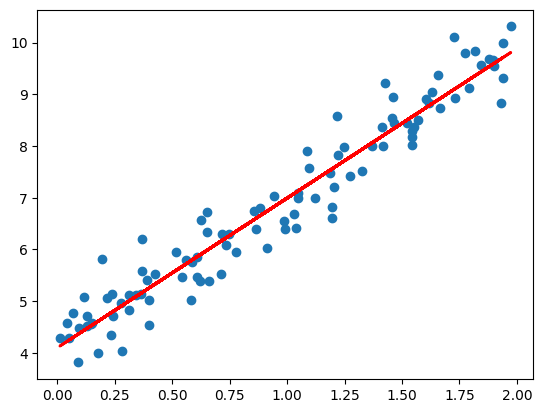

In [8]:
if __name__ == "__main__":
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = np.squeeze(4 + 3 * X + np.random.randn(100, 1) * 0.5)
    
    model = LinearRegression(learning_rate=0.1, iterations=200)
    model.fit(X, y)
    
    y_pred = model.predict(X)
    
    print(f"True function: y = 4 + 3*x + noise")
    print(f"Learned: y = {model.bias:.4f} + {model.weights[0]:.4f}*x")
    params = model.get_params()
    print(f"weights: {params['weights']}, bias: {params['bias']}")

plt.scatter(X, y)
plt.plot(X, y_pred, color='red', linewidth=2)
plt.show()